# Step 1: Load MNIST Data

In [1]:
import tensorflow as tf

# Load MNIST (60k training, 10k test)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Add channel dimension: (batch, 28, 28, 1)
x_train = x_train[..., None]
x_test  = x_test[..., None]

print("Train samples:", x_train.shape, "Test samples:", x_test.shape)

11490434/11490434 [==============================] - 14s 1us/step
Train samples: (60000, 28, 28, 1) Test samples: (10000, 28, 28, 1)


# Step 2: Build a Simple CNN

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, 3, activation="relu", input_shape=(28,28,1)),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Step 3: Train on GPU

In [3]:
with tf.device("/GPU:0"):
    history = model.fit(
        x_train, y_train,
        validation_split=0.1,  # hold out 6k samples
        epochs=5,
        batch_size=64,
    )

Epoch 1/5
844/844 [==============================] - 21s 2ms/step - loss: 0.1595 - accuracy: 0.9519 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 2/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0379 - val_accuracy: 0.9897
Epoch 3/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 4/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0342 - val_accuracy: 0.9895
Epoch 5/5
844/844 [==============================] - 2s 2ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0368 - val_accuracy: 0.9910


# Step 4: Evaluate on Test Set

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9902
Test accuracy: 99.02%


# Step 5: Visualize a Few Predictions

1/1 [==============================] - 0s 72ms/step


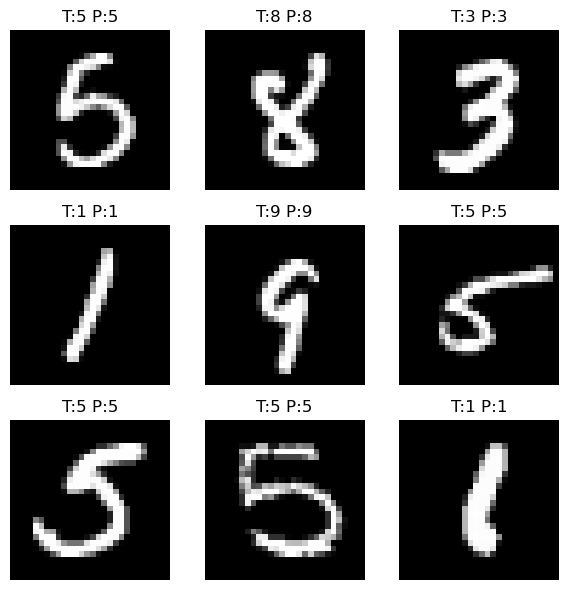

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Grab 9 test images
idxs = np.random.choice(len(x_test), 9, replace=False)
imgs, labels = x_test[idxs], y_test[idxs]
preds = model.predict(imgs).argmax(axis=1)

plt.figure(figsize=(6,6))
for i, (img, true, pred) in enumerate(zip(imgs, labels, preds)):
    plt.subplot(3,3,i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    title = f"T:{true} P:{pred}"
    plt.title(title)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Hello, how are you today? I'm fine, thank you for asking!